In [1]:
import tensorflow as tf

In [2]:
import numpy as np

## Generating two classes of random points in a 2D plane

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov= [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov= [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

## Lets stack the above arrays with shape (1000, 2) together into a single array

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
inputs.shape

(2000, 2)

Lets generate the corresponding targets labels, an array fo zeros and ones of shape (2000, 1) where the targest [i, 0] is 0 if input[i] belongs to class 0, abd inversely

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [7]:
import matplotlib.pyplot as plt

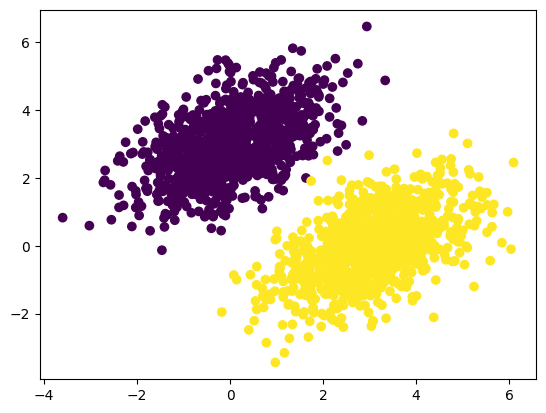

In [8]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# lets create a linear classifier that can learn to seperate these two
## Lets create our variable w and b

In [9]:
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

## Here comes our forward pass function

In [10]:
def model(inputs):
  return tf.matmul(inputs, w) + b

## The mean squared error loss function


In [11]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)                 # this is averaging the per_sample_losses into a single scaler

## The training loss function
This receives training data and updates the weight W and b so as to minimize loss on the data

In [12]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


### we will do batch training instead of mini-batch training. we will run each training step(gradient computation and weight update) for all the data rather than iterate over the data in small batches

In [13]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step {step} : {loss:.4f}")

loss at step 0 : 1.2922
loss at step 1 : 0.2774
loss at step 2 : 0.1318
loss at step 3 : 0.1044
loss at step 4 : 0.0948
loss at step 5 : 0.0883
loss at step 6 : 0.0827
loss at step 7 : 0.0776
loss at step 8 : 0.0729
loss at step 9 : 0.0687
loss at step 10 : 0.0648
loss at step 11 : 0.0613
loss at step 12 : 0.0580
loss at step 13 : 0.0551
loss at step 14 : 0.0524
loss at step 15 : 0.0499
loss at step 16 : 0.0477
loss at step 17 : 0.0456
loss at step 18 : 0.0437
loss at step 19 : 0.0420
loss at step 20 : 0.0405
loss at step 21 : 0.0390
loss at step 22 : 0.0377
loss at step 23 : 0.0365
loss at step 24 : 0.0354
loss at step 25 : 0.0344
loss at step 26 : 0.0335
loss at step 27 : 0.0327
loss at step 28 : 0.0319
loss at step 29 : 0.0312
loss at step 30 : 0.0306
loss at step 31 : 0.0300
loss at step 32 : 0.0295
loss at step 33 : 0.0290
loss at step 34 : 0.0286
loss at step 35 : 0.0282
loss at step 36 : 0.0278
loss at step 37 : 0.0275
loss at step 38 : 0.0272
loss at step 39 : 0.0269


Lets plot how our linear model classifies the training data points.

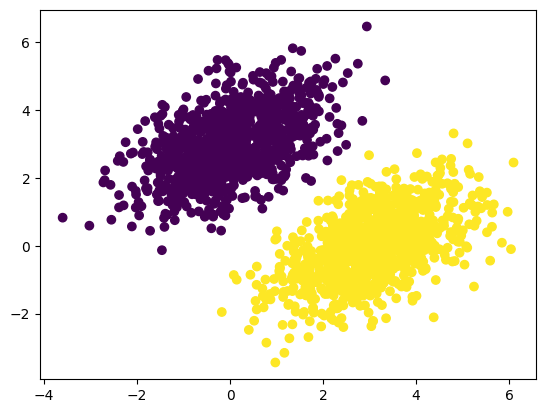

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Lets plot our boundary line from w1 * x + w2 * y + b = 0.5, we get:
y = -w1/w2 * x + (0.5-b)/w2. lets see the code below:

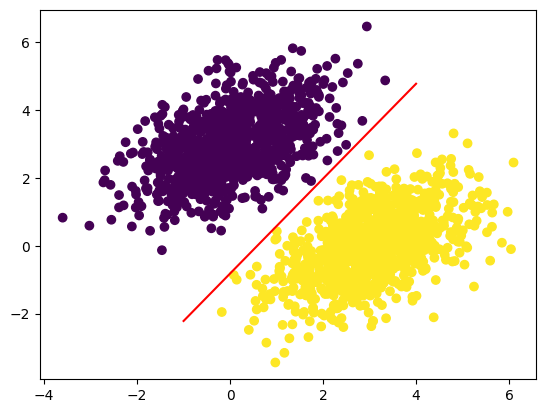

In [15]:
x = np.linspace(-1, 4, 100)
y = -w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, 'r-')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()